In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from prophet import Prophet
import plotly.graph_objects as go
import plotly.express as px

In [8]:
sales_train_df = pd.read_csv('data/train.csv', low_memory=False)
#sales_train_df.head()
store_info_df = pd.read_csv('data/store.csv')

In [6]:
#Dados das Vendas
#sales_train.isnull().sum()
#sales_train.hist(bins=30, figsize=(20,20), color='r');

In [9]:
closed_train_df = sales_train_df[sales_train_df['Open'] == 0]
open_train_df = sales_train_df[sales_train_df['Open'] == 1]

In [4]:
closed_train_df.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
291     292          5  2015-07-31      0          0     0      1   
875     876          5  2015-07-31      0          0     0      1   
1406    292          4  2015-07-30      0          0     0      1   
1990    876          4  2015-07-30      0          0     0      1   
2521    292          3  2015-07-29      0          0     0      1   

     StateHoliday  SchoolHoliday  
291             0              1  
875             0              1  
1406            0              1  
1990            0              1  
2521            0              1

In [5]:
sales_train_df = sales_train_df[sales_train_df['Open'] == 1]
sales_train_df.shape

(844392, 9)

In [6]:
sales_train_df.drop(['Open'], axis=1, inplace=True)

In [10]:
str_cols = ['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth']
for str in str_cols:
    store_info_df[str].fillna(0, inplace=True)

In [11]:
store_info_df['CompetitionDistance'].fillna(store_info_df['CompetitionDistance'].mean(), inplace=True)

In [12]:
sales_train_all_df = pd.merge(sales_train_df, store_info_df, how = 'inner', on='Store')

In [13]:
sales_train_all_df.shape

(1017209, 18)

In [14]:
sales_train_all_df.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      1          4  2015-07-30   5020        546     1      1            0   
2      1          3  2015-07-29   4782        523     1      1            0   
3      1          2  2015-07-28   5011        560     1      1            0   
4      1          1  2015-07-27   6102        612     1      1            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              1         c          a               1270.0   
1              1         c          a               1270.0   
2              1         c          a               1270.0   
3              1         c          a               1270.0   
4              1         c          a               1270.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   
1                        9.0                    2008.0       0   
2                        9.0                    2008.0       0   
3                        9.0                    2008.0       0   
4                        9.0                    2008.0       0   

   Promo2SinceWeek  Promo2SinceYear PromoInterval  
0              0.0              0.0             0  
1              0.0              0.0             0  
2              0.0              0.0             0  
3              0.0              0.0             0  
4              0.0              0.0             0

/var/folders/wh/kpgmglvs4l35zzq_d3r6t2bc0000gn/T/ipykernel_78525/937515017.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = sales_train_all_df.corr()


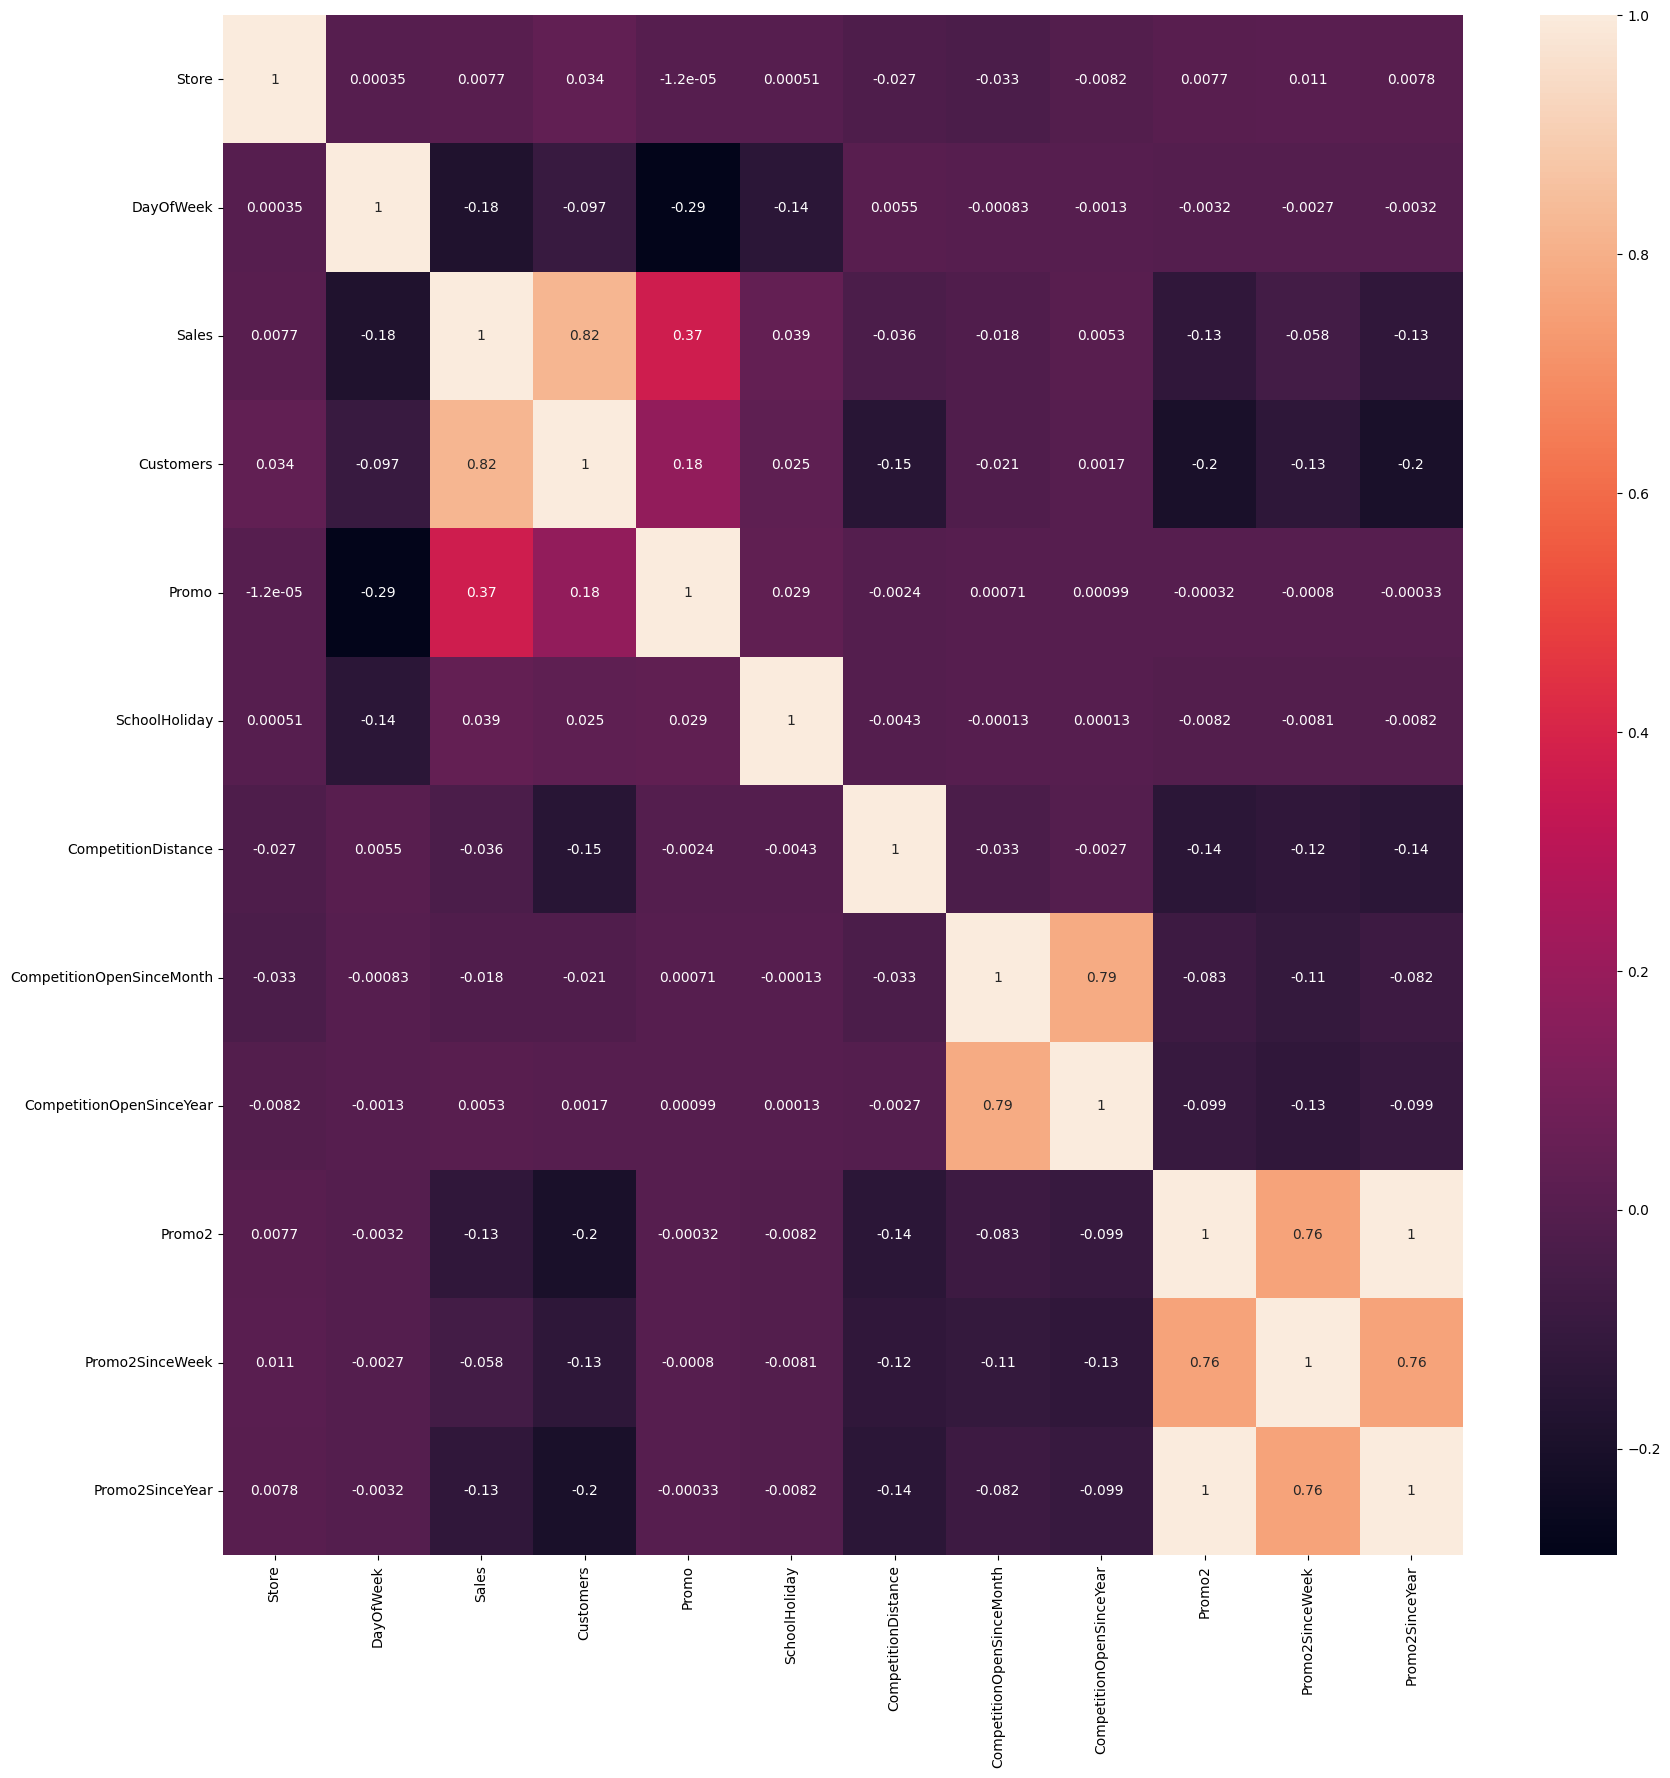

In [31]:
correlations = sales_train_all_df.corr()
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot=True);

In [33]:
correlations = sales_train_all_df.corr()['Sales'].sort_values()
correlations

/var/folders/wh/kpgmglvs4l35zzq_d3r6t2bc0000gn/T/ipykernel_78525/1950390705.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = sales_train_all_df.corr()['Sales'].sort_values()


DayOfWeek                   -0.178736
Promo2SinceYear             -0.127621
Promo2                      -0.127596
Promo2SinceWeek             -0.058476
CompetitionDistance         -0.036343
CompetitionOpenSinceMonth   -0.018370
CompetitionOpenSinceYear     0.005266
Store                        0.007710
SchoolHoliday                0.038617
Promo                        0.368145
Customers                    0.823597
Sales                        1.000000
Name: Sales, dtype: float64

In [15]:
sales_train_all_df['Year'] = pd.DatetimeIndex(sales_train_all_df['Date']).year
sales_train_all_df['Month'] = pd.DatetimeIndex(sales_train_all_df['Date']).month
sales_train_all_df['Day'] = pd.DatetimeIndex(sales_train_all_df['Date']).day


In [16]:
sales_train_all_df.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      1          4  2015-07-30   5020        546     1      1            0   
2      1          3  2015-07-29   4782        523     1      1            0   
3      1          2  2015-07-28   5011        560     1      1            0   
4      1          1  2015-07-27   6102        612     1      1            0   

   SchoolHoliday StoreType  ... CompetitionDistance  \
0              1         c  ...              1270.0   
1              1         c  ...              1270.0   
2              1         c  ...              1270.0   
3              1         c  ...              1270.0   
4              1         c  ...              1270.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   
1                        9.0                    2008.0       0   
2                        9.0                    2008.0       0   
3                        9.0                    2008.0       0   
4                        9.0                    2008.0       0   

   Promo2SinceWeek  Promo2SinceYear  PromoInterval  Year  Month  Day  
0              0.0              0.0              0  2015      7   31  
1              0.0              0.0              0  2015      7   30  
2              0.0              0.0              0  2015      7   29  
3              0.0              0.0              0  2015      7   28  
4              0.0              0.0              0  2015      7   27  

[5 rows x 21 columns]

Text(0.5, 1.0, 'Média de Vendas por mês')

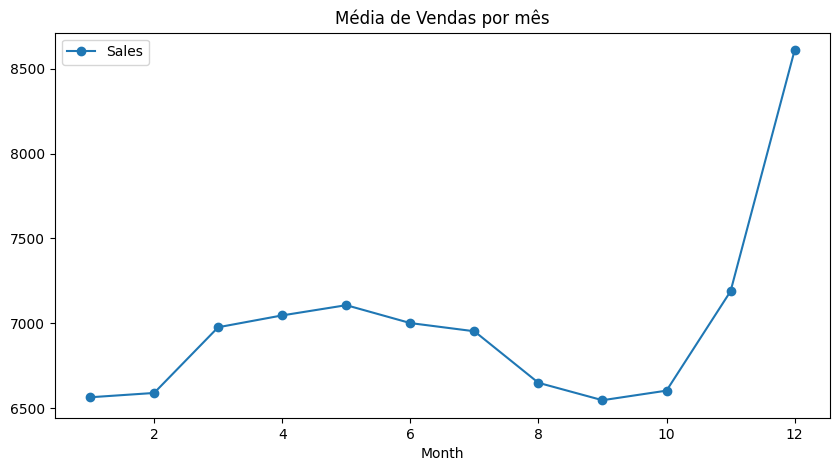

In [42]:
axis = sales_train_all_df.groupby('Month')[['Sales']].mean().plot(figsize=(10,5), marker='o')
axis.set_title('Média de Vendas por mês')

Text(0.5, 1.0, 'Média de Clientes por mês')

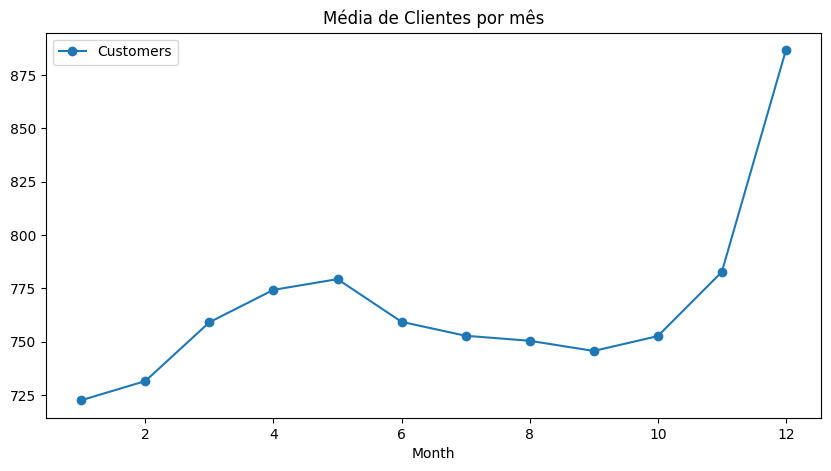

In [44]:
axis = sales_train_all_df.groupby('Month')[['Customers']].mean().plot(figsize=(10,5), marker='o')
axis.set_title('Média de Clientes por mês')

Text(0.5, 1.0, 'Média de Vendas por dia')

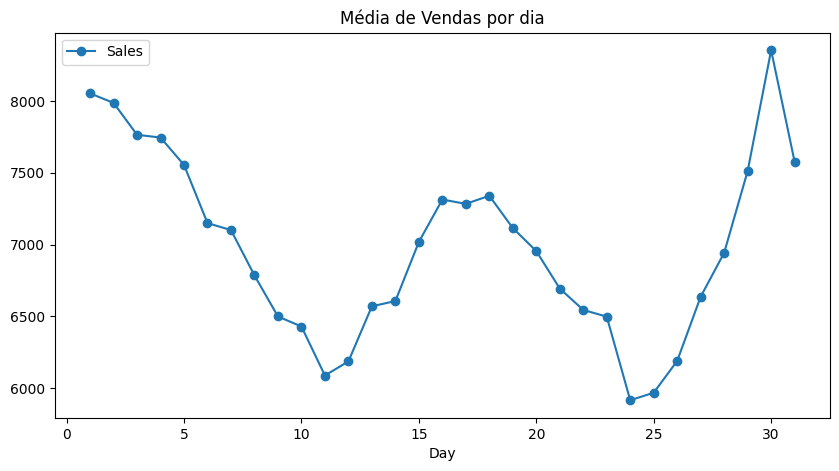

In [45]:
axis = sales_train_all_df.groupby('Day')[['Sales']].mean().plot(figsize=(10,5), marker='o')
axis.set_title('Média de Vendas por dia')

Text(0.5, 1.0, 'Média de Clientes por dia')

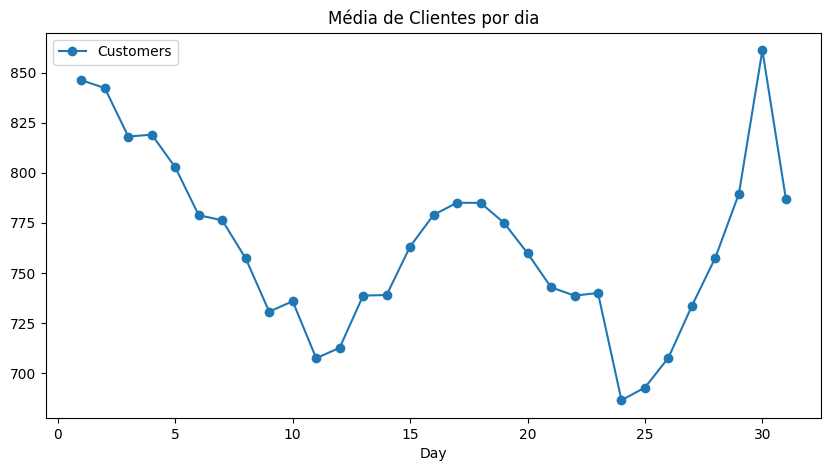

In [46]:
axis = sales_train_all_df.groupby('Day')[['Customers']].mean().plot(figsize=(10,5), marker='o')
axis.set_title('Média de Clientes por dia')

Text(0.5, 1.0, 'Média de Vendas por dia da semana')

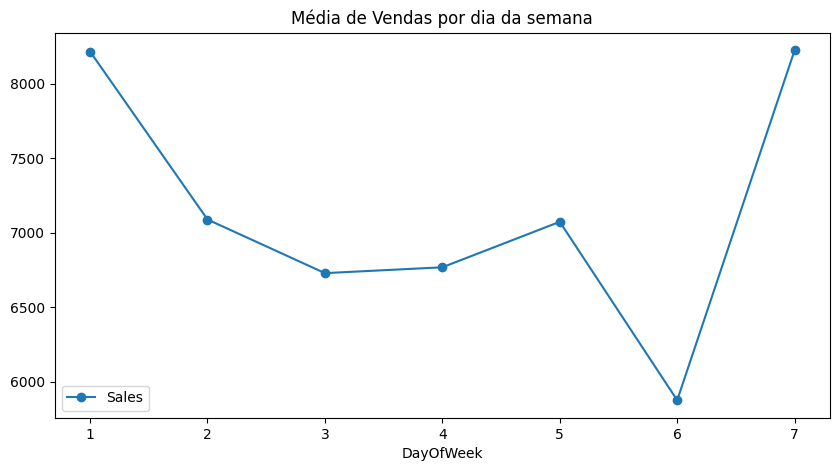

In [48]:
axis = sales_train_all_df.groupby('DayOfWeek')[['Sales']].mean().plot(figsize=(10,5), marker='o')
axis.set_title('Média de Vendas por dia da semana')

Text(0.5, 1.0, 'Média de Clientes por dia da semana')

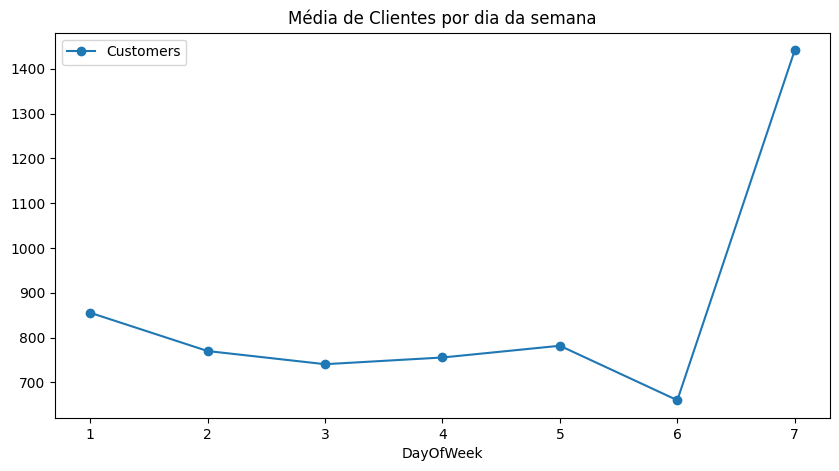

In [49]:
axis = sales_train_all_df.groupby('DayOfWeek')[['Customers']].mean().plot(figsize=(10,5), marker='o')
axis.set_title('Média de Clientes por dia da semana')

/var/folders/wh/kpgmglvs4l35zzq_d3r6t2bc0000gn/T/ipykernel_78525/1967053852.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_train_all_df.groupby(['Date','StoreType']).mean()['Sales'].unstack().plot(ax= ax)


<AxesSubplot: xlabel='Date'>

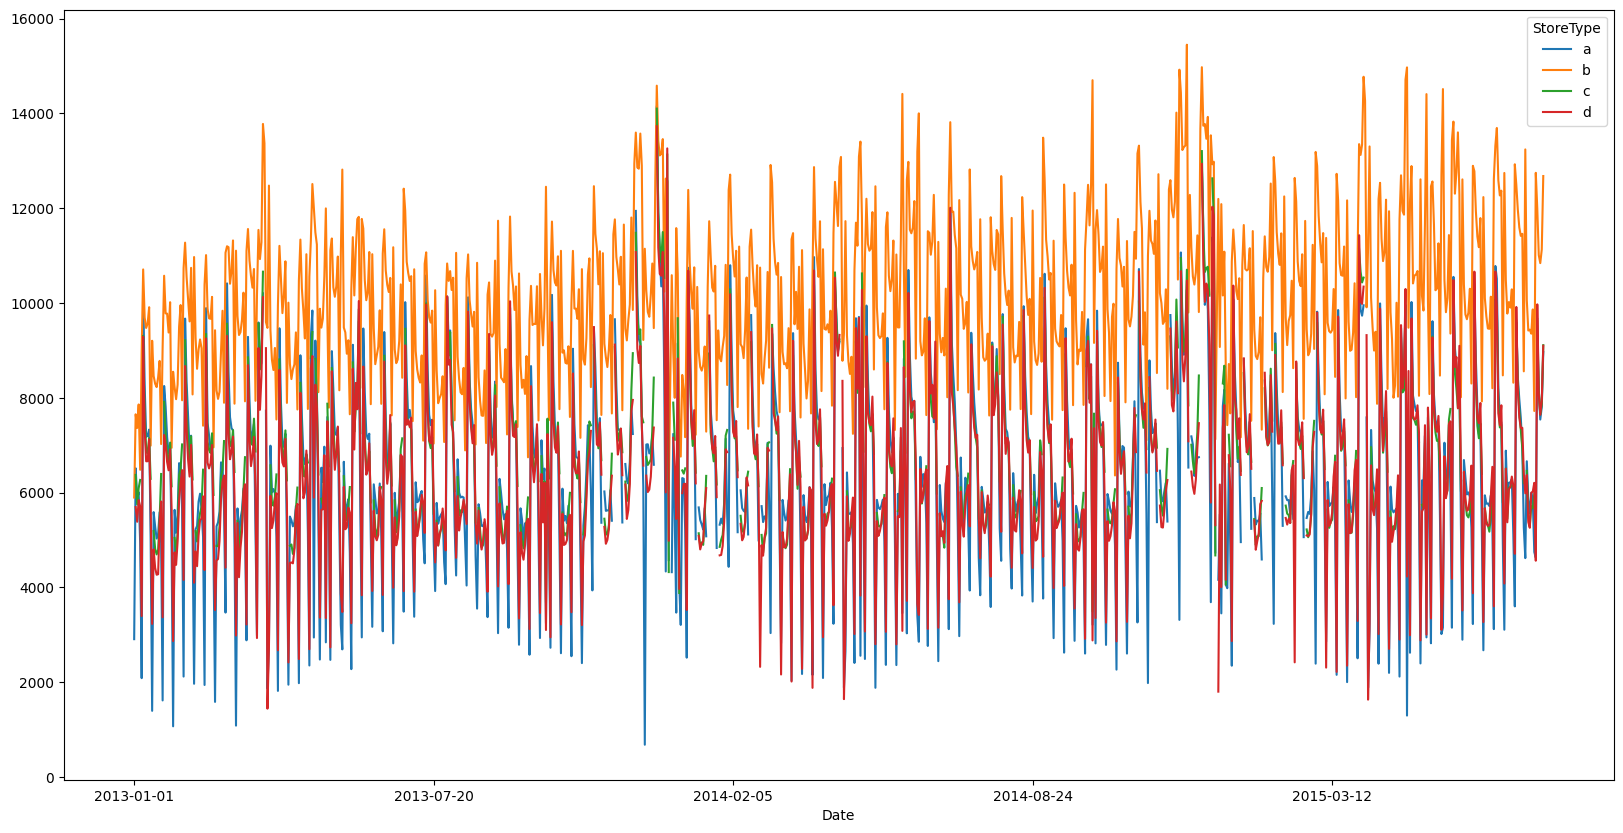

In [52]:
fig, ax = plt.subplots(figsize= (20,10))
sales_train_all_df.groupby(['Date','StoreType']).mean()['Sales'].unstack().plot(ax= ax)

<AxesSubplot: xlabel='Promo', ylabel='Sales'>

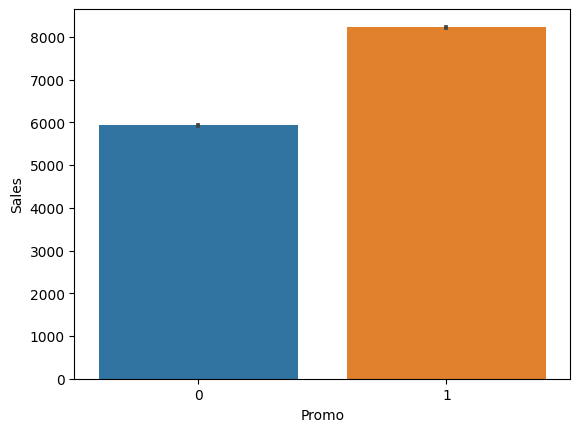

In [56]:
sns.barplot(x = 'Promo', y = 'Sales', data = sales_train_all_df)

<AxesSubplot: xlabel='Promo', ylabel='Customers'>

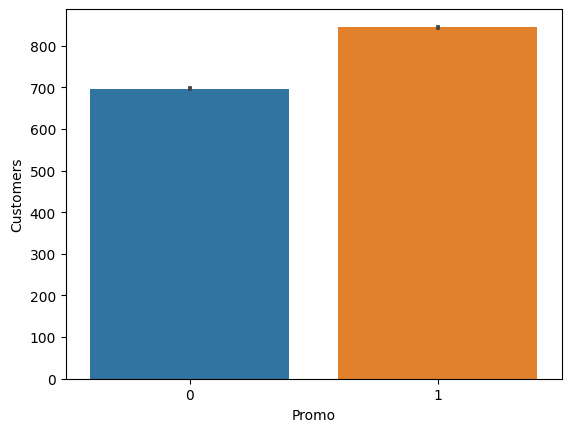

In [57]:
sns.barplot(x = 'Promo', y = 'Customers', data = sales_train_all_df)

In [92]:
def sales_predition(store_id, sales_df, holidays, periods):
    sales_df = sales_df[sales_df['Store'] == store_id]
    sales_df = sales_df[['Date', 'Sales']].rename(columns = {'Date': 'ds', 'Sales':'y'})
    sales_df = sales_df.sort_values(by = 'ds')
    
    model = Prophet(holidays=holidays)
    model.fit(sales_df)
    future = model.make_future_dataframe(periods = periods)
    forecast = model.predict(future)
    figure1 = model.plot(forecast, xlabel= 'Data', ylabel='Vendas')
    figure2 = model.plot_components(forecast)
    
    return sales_df, forecast

In [70]:
#df = sales_predition(10,sales_train_all_df,10)
#df.head()

ds     y
7819  2013-01-02  4812
7818  2013-01-03  4675
7817  2013-01-04  5114
7816  2013-01-05  4256
7815  2013-01-07  7804

07:52:45 - cmdstanpy - INFO - Chain [1] start processing
07:52:46 - cmdstanpy - INFO - Chain [1] done processing


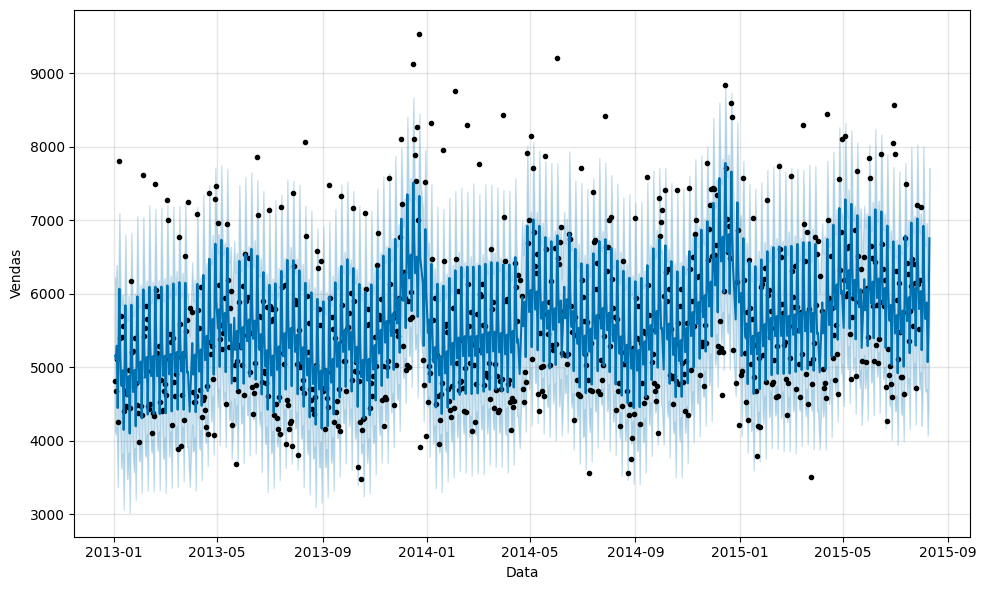

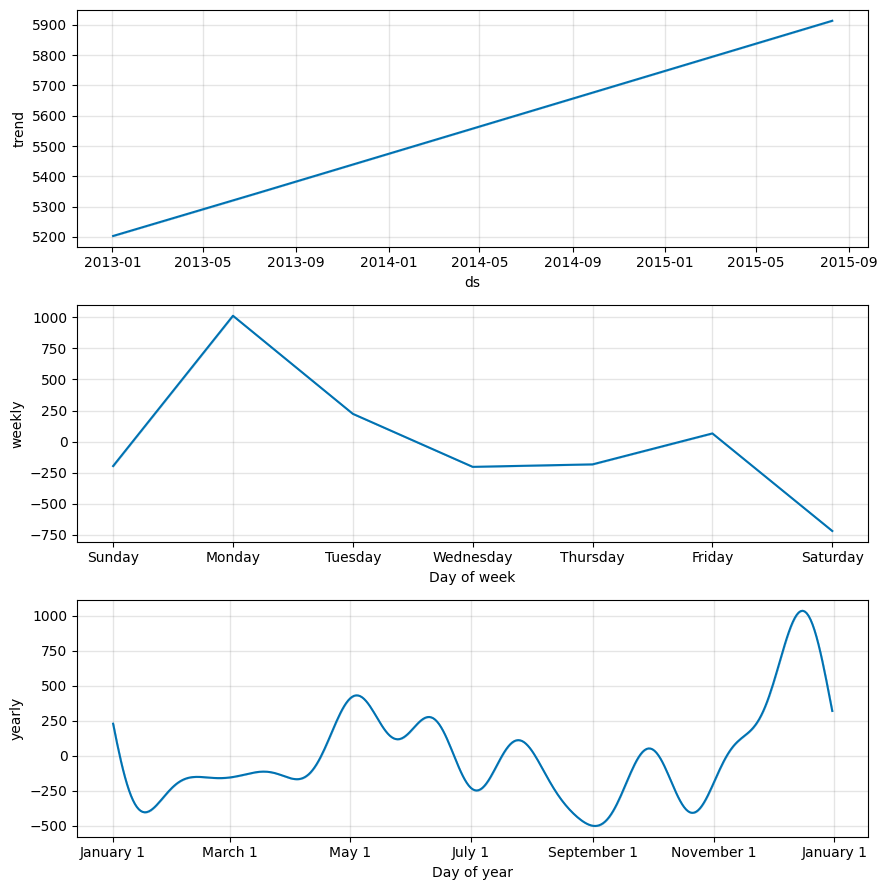

In [72]:
df_origin, df_predition = sales_predition(10, sales_train_all_df, 10)

In [73]:
df_predition.tail(11) # df_predition.tail(11).to_csv('previsoes_vendas.csv')

ds        trend   yhat_lower   yhat_upper  trend_lower  \
783 2015-07-31  5906.222660  4935.151594  7093.568798  5906.222660   
784 2015-08-01  5906.972065  4203.616448  6279.031411  5906.972065   
785 2015-08-02  5907.721470  4646.231953  6779.458720  5907.721470   
786 2015-08-03  5908.470874  5887.714062  8006.895032  5908.470874   
787 2015-08-04  5909.220279  5015.348628  7155.941474  5909.220279   
788 2015-08-05  5909.969684  4689.757106  6710.000802  5909.969684   
789 2015-08-06  5910.719088  4663.143252  6650.502426  5910.719088   
790 2015-08-07  5911.468493  4702.526517  6959.501967  5911.468493   
791 2015-08-08  5912.217898  4071.402116  6171.632437  5912.217839   
792 2015-08-09  5912.967303  4525.578995  6641.425112  5912.967036   
793 2015-08-10  5913.716707  5743.427763  7711.598813  5913.716311   

     trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
783  5906.222660      129.632238            129.632238            129.632238   
784  5906.972065     -673.655513           -673.655513           -673.655513   
785  5907.721470     -171.559961           -171.559961           -171.559961   
786  5908.470874     1016.130253           1016.130253           1016.130253   
787  5909.220279      203.313856            203.313856            203.313856   
788  5909.969684     -247.982974           -247.982974           -247.982974   
789  5910.719088     -253.209082           -253.209082           -253.209082   
790  5911.468493      -29.751888            -29.751888            -29.751888   
791  5912.217898     -840.505967           -840.505967           -840.505967   
792  5912.967303     -343.573730           -343.573730           -343.573730   
793  5913.716710      841.133067            841.133067            841.133067   

          weekly  weekly_lower  weekly_upper      yearly  yearly_lower  \
783    65.860479     65.860479     65.860479   63.771759     63.771759   
784  -719.226804   -719.226804   -719.226804   45.571291     45.571291   
785  -196.817704   -196.817704   -196.817704   25.257743     25.257743   
786  1012.945763   1012.945763   1012.945763    3.184490      3.184490   
787   223.602690    223.602690    223.602690  -20.288834    -20.288834   
788  -203.177195   -203.177195   -203.177195  -44.805779    -44.805779   
789  -183.187229   -183.187229   -183.187229  -70.021852    -70.021852   
790    65.860479     65.860479     65.860479  -95.612368    -95.612368   
791  -719.226804   -719.226804   -719.226804 -121.279163   -121.279163   
792  -196.817704   -196.817704   -196.817704 -146.756026   -146.756026   
793  1012.945763   1012.945763   1012.945763 -171.812696   -171.812696   

     yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
783     63.771759                   0.0                         0.0   
784     45.571291                   0.0                         0.0   
785     25.257743                   0.0                         0.0   
786      3.184490                   0.0                         0.0   
787    -20.288834                   0.0                         0.0   
788    -44.805779                   0.0                         0.0   
789    -70.021852                   0.0                         0.0   
790    -95.612368                   0.0                         0.0   
791   -121.279163                   0.0                         0.0   
792   -146.756026                   0.0                         0.0   
793   -171.812696                   0.0                         0.0   

     multiplicative_terms_upper         yhat  
783                         0.0  6035.854898  
784                         0.0  5233.316552  
785                         0.0  5736.161509  
786                         0.0  6924.601127  
787                         0.0  6112.534135  
788                         0.0  5661.986710  
789                         0.0  5657.510007  
790                         0.0  5881.716605  
791                         0.0  5071.711931 

In [86]:
school_holidays = sales_train_all_df[sales_train_all_df['SchoolHoliday'] == 1].loc[:,'Date'].values
school_holidays.shape

(163457,)

In [79]:
#len(np.unique(school_holidays))
state_holidays = sales_train_all_df[(sales_train_all_df['StateHoliday'] == 'a') | 
                                    (sales_train_all_df['StateHoliday'] == 'b') |
                                    (sales_train_all_df['StateHoliday'] == 'c')].loc[:,'Date'].values

In [80]:
state_holidays.shape

(910,)

In [82]:
state_holiday = pd.DataFrame({'ds': pd.to_datetime(state_holidays), 'holiday': 'state_holiday'})

In [87]:
school_holiday = pd.DataFrame({'ds': pd.to_datetime(school_holidays), 'holiday': 'school_holiday'})

In [91]:
school_state_holiday = pd.concat((state_holiday, school_holiday))
school_state_holiday

ds         holiday
0      2014-10-03   state_holiday
1      2013-10-03   state_holiday
2      2015-06-04   state_holiday
3      2014-06-19   state_holiday
4      2013-05-30   state_holiday
...           ...             ...
163452 2013-02-05  school_holiday
163453 2013-02-04  school_holiday
163454 2013-01-04  school_holiday
163455 2013-01-03  school_holiday
163456 2013-01-02  school_holiday

[164367 rows x 2 columns]

08:23:24 - cmdstanpy - INFO - Chain [1] start processing
08:23:24 - cmdstanpy - INFO - Chain [1] done processing


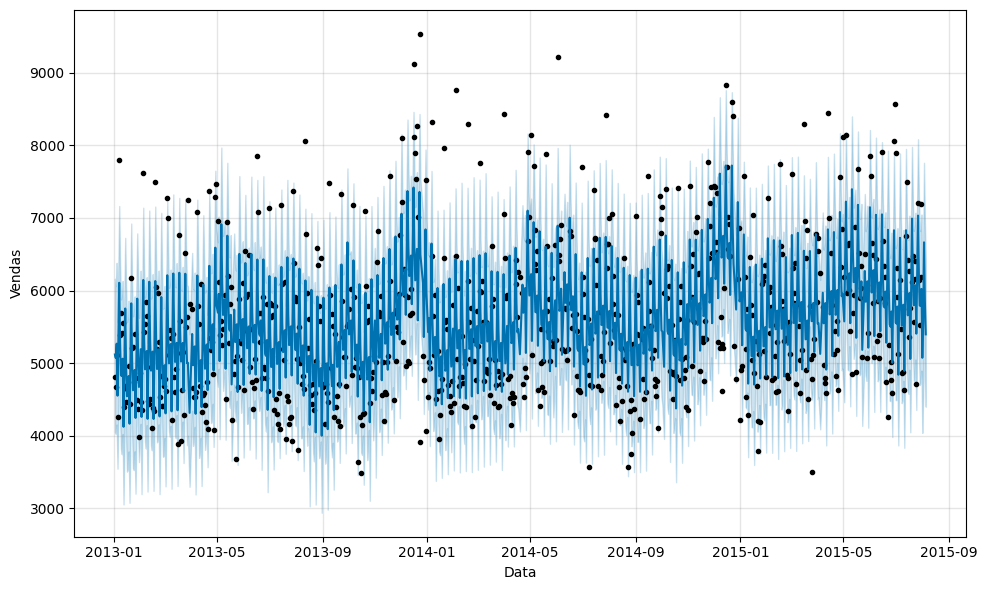

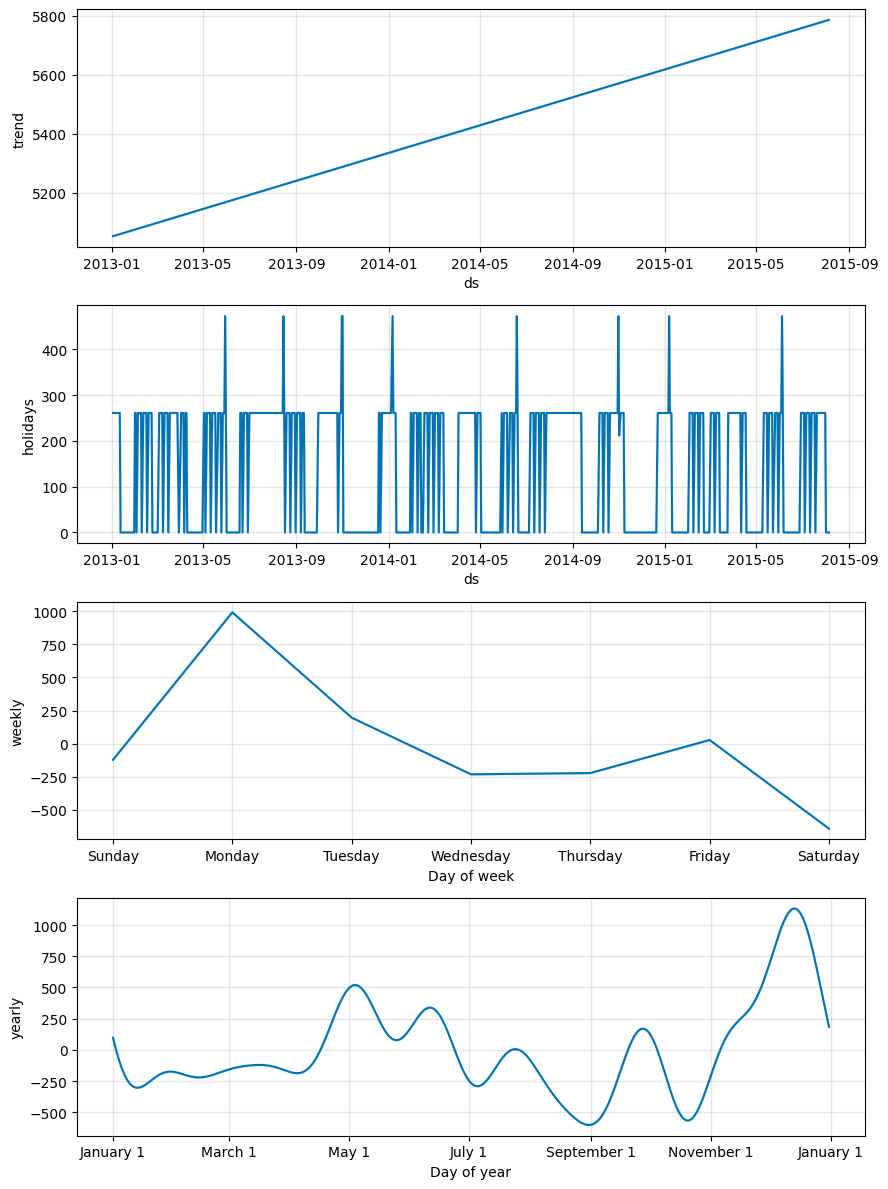

In [94]:
df_original, df_predition = sales_predition(10, sales_train_all_df, school_state_holiday, 5)

# Gráficos para meu dashboard

In [17]:
fig1 = go.Figure()
fig1.add_trace(go.Indicator(
        title = {"text": f"<span style='font-size:150%'>Período de Análise</span><br><span style='font-size:70%'>entre o ano de:</span><br><span>{sales_train_all_df['Year'].min()} - {sales_train_all_df['Year'].max()}</span>"},
        value = (sales_train_all_df['Year'].max() - sales_train_all_df['Year'].min()),
        number = {'suffix': " Anos"}
))

In [18]:
df2_dataframe = sales_train_all_df
df2_dataframe[['Date', 'Sales']].rename(columns = {'Date': 'date', 'Sales':'sales'})


df2 = df2_dataframe.groupby(['Date'])['Sales'].sum().reset_index()
df2.sort_values(ascending=False, inplace=True, by='Sales')

Year = (df2_dataframe['Year'].max()) - (df2_dataframe['Year'].min())

fig2 = go.Figure()
fig2.add_trace(go.Indicator(mode='number+delta',
        title = {"text": f"<span style='font-size:150%'>Maior Rendimento diário em {Year} anos</span><br><span style='font-size:70%'> em relação a média</span><br>"},
        value = df2['Sales'].iloc[0],
        number = {'prefix': "AKZ "},
        delta = {'relative': True, 'valueformat': '.1%', 'reference': df2['Sales'].mean()}
))

In [19]:
df2_dataframe = sales_train_all_df
df2_dataframe[['Date', 'Sales']].rename(columns = {'Date': 'date', 'Sales':'sales'})


df2 = df2_dataframe.groupby(['Date'])['Sales'].sum().reset_index()
df2.sort_values(ascending=False, inplace=True, by='Sales')

Year = (df2_dataframe['Year'].max()) - (df2_dataframe['Year'].min())

fig2 = go.Figure()
fig2.add_trace(go.Indicator(mode='number+delta',
        title = {"text": f"<span style='font-size:150%'>Menor Rendimento diário em {Year} anos</span><br><span style='font-size:70%'> em relação a média</span><br>"},
        value = df2['Sales'].iloc[0],
        number = {'prefix': "AKZ "},
        delta = {'relative': True, 'valueformat': '.1%', 'reference': df2['Sales'].mean()}
))

In [42]:
df3 = sales_train_all_df[sales_train_all_df.columns[1:9]].head(10)


fig3 = go.Figure()
fig3.add_trace(
    go.Table(
        header=dict(
            values=df3.columns,
            font=dict(size=10),
            align="left"
        ),
        cells=dict(
            values=[df3[k].tolist() for k in df3.columns[0:,]],
            align = "left")
    ))

fig3.update_layout(
    showlegend=False,
    title_text="Amostra dos dados a serem analisados",
)


# fig3.add_trace(go.Scatter(
#         x=df3["Date"],
#         y=df3["Sales"],
#         mode="lines",
#         name="hash-rate-TH/s"
#     ))

In [21]:
df4 = sales_train_all_df.groupby('Month')['Sales'].sum().reset_index()

fig = px.pie(df4, values='Sales', names='Month', title='Distribuição das receitas por mês')
fig.show()

In [22]:
df5 = sales_train_all_df.groupby('Day')['Sales'].mean().reset_index()
fig5 = go.Figure()
fig5.add_trace(go.Scatter(
        x=df5["Day"],
        y=df5["Sales"],
        mode="lines",
        name="hash-rate-TH/s"
    ))
fig5.update_layout(
    showlegend=False,
    title_text="Média das vendas por dia",
)

#Dia/DayOfWeek/Mês/Ano

In [23]:
df6 = sales_train_all_df.groupby('Day')['Customers'].mean().reset_index()
fig6 = go.Figure()
fig6.add_trace(go.Scatter(
        x=df6["Day"],
        y=df6["Customers"],
        mode="lines",
        name="hash-rate-TH/s"
    ))
fig6.update_layout(
    showlegend=False,
    title_text="Média de clientes por dia",
)

# fig7 = px.line(df6, x='Day', y='Customers', title='Média de clientes por dia')

# fig7.update_xaxes(
#     rangeslider_visible=True,
#     rangeselector=dict(
#         buttons=list([
#             dict(count=1, label="1m", step="month", stepmode="backward"),
#             dict(count=6, label="6m", step="month", stepmode="backward"),
#             dict(count=1, label="YTD", step="year", stepmode="todate"),
#             dict(count=1, label="1y", step="year", stepmode="backward"),
#             dict(step="all")
#         ])
#     )
# )

#Dia/DayOfWeek/Mês/Ano

In [26]:
d7 = sales_train_all_df[sales_train_all_df['Promo']==1]
fig7 = go.Figure()
fig7.add_trace(go.Indicator(
        title = {"text": f"<span style='font-size:150%'>Promoções realizadas</span><br><span style='font-size:70%'>entre o ano de:</span><br><span>{d7['Year'].min()} - {d7['Year'].max()}</span>"},
        value = (d7['Promo'].count()),
        number = {'suffix': ""}
))

#ANO/MES

In [24]:
d8 = sales_train_all_df[sales_train_all_df['Customers']>0]
fig8 = go.Figure()
fig8.add_trace(go.Indicator(
        title = {"text": f"<span style='font-size:150%'>Clientes Alcançados</span><br><span style='font-size:70%'>entre o ano de:</span><br><span>{d8['Year'].min()} - {d8['Year'].max()}</span>"},
        value = (d8['Customers'].count()),
        number = {'suffix': ""}
))


In [25]:
d9 = sales_train_all_df
fig9 = go.Figure()
fig9.add_trace(go.Indicator(
        title = {"text": f"<span style='font-size:150%'>Receitas Arrecadadas</span><br><span style='font-size:70%'>entre o ano de:</span><br><span>{d9['Year'].min()} - {d9['Year'].max()}</span>"},
        value = (d9['Sales'].sum()),
        number = {'prefix': "AKZ "}
))

In [41]:
sales_train_all_df[sales_train_all_df.columns[1:9]]

DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0                5  2015-07-31   5263        555     1      1            0   
1                4  2015-07-30   5020        546     1      1            0   
2                3  2015-07-29   4782        523     1      1            0   
3                2  2015-07-28   5011        560     1      1            0   
4                1  2015-07-27   6102        612     1      1            0   
...            ...         ...    ...        ...   ...    ...          ...   
1017204          6  2013-01-05   4771        339     1      0            0   
1017205          5  2013-01-04   4540        326     1      0            0   
1017206          4  2013-01-03   4297        300     1      0            0   
1017207          3  2013-01-02   3697        305     1      0            0   
1017208          2  2013-01-01      0          0     0      0            a   

         SchoolHoliday  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1  
...                ...  
1017204              1  
1017205              1  
1017206              1  
1017207              1  
1017208              1  

[1017209 rows x 8 columns]